In [2]:
# from last time
import numpy as np
def rand_graph(V,E):
    """Generates random graph described above,
    with V vertices and E edges. Returns
    adjacency matrix A."""
    A = np.zeros((V,V)) # initialize to all zeros
    edges_so_far = 0 # counts edges added so far
    while edges_so_far < E:
        i = randint(0,V-1)
        j = randint(0,V-1)
        if (i != j and A[i,j] == 0):
            # above tests whether i,j are different
            # and no edge already between them
            A[i,j] = 1  # add edge between i,j
            A[j,i] = 1  # keep adjacency matrix symmetric
            edges_so_far += 1 # increment number of edges added
    return A

In [3]:
# from last time
def deg_seq(A):
    """Returns list of degrees of vertices
    in graph represented by adj matrix A."""
    # sum(A[w]) equals degree of w
    return [sum(A[w]) for w in range(len(A))]
    # note len(A) is equal to number of rows of A
    # (which equals number of vertices)
    

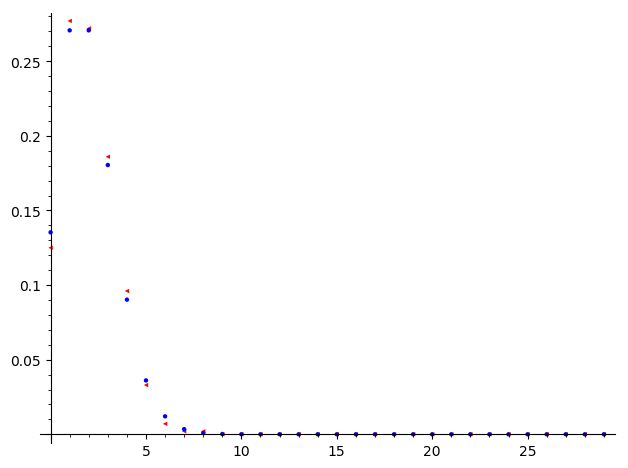

In [4]:
# Want to compare degree seq to Poisson
# with intensity lam = 2E/V
# Below will make list_plot of degree sequence, which 
# we will plot on same graph as Poisson pmf next class
V = 1000
E = 1000
lam = 2*E/V
A = rand_graph(V,E)
deg = deg_seq(A)
deg_table = np.zeros(E)
# deg_table[i] will be num of vertices with deg=i
#print(deg)
for d in deg:
    deg_table[int(d)] += 1/V
#print(deg_table)
list_plot(deg_table[0:30], color="red", marker="<")+\
list_plot([lam^k * exp(-lam)/factorial(k) for k in range(30)])
# red markers give degree sequence for the random graph
# blue is the pmf for Poisson lambda
# the two distributions are very close (as V gets large)

In [46]:
# Code to determine whether graph is connected
# This is similar to your task for Project 3
# We will use a Depth First Search (using recursion)
# will represent graph with adjacency matrix A
visited = [] # will keep track of which vertices have been visited
def is_connected(A):
    """Returns True iff the graph corresponding to 
    adjacency matrix A is connected."""
    
    global visited # use global copy of visited defined outside function
    # initialize visited to all unvisited
    visited = [False for i in range(len(A))]
    # since visited is global, this changes the
    # value outside of the function as well
    # visited[i] will be set True if i is visited
    
    explore(A,0)
    if False in visited:
        # test if some vertex is unvisited
        return False
    else: 
        return True

def explore(A,v):
    """Explore all the vertices accesible from v
    that have not been visited yet.  Mark all of 
    these as visited."""
    global visited
    visited[v]=True
    print(v) # print out vertices as they're visited 
    # (just for testing; should get rid of for large graphs)
    
    for w in range(len(A)):
        # iterate over all vertices
        if A[v,w]==1 and visited[w]==False:
            # get here for all w unvisited
            # that neighbor v
            explore(A,w)

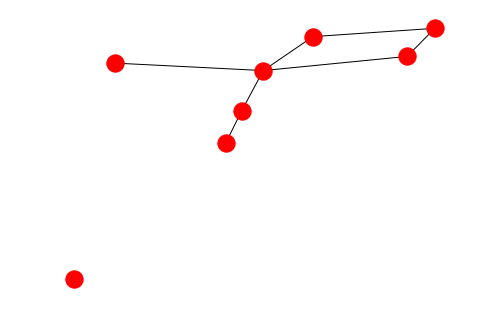

In [29]:
import networkx as nx
A = rand_graph(8,7)
nx.draw(nx.Graph(A))

In [30]:
is_connected(A) # test whether above graph is connected 

False

In [5]:
# example graph from white board
A_ex = np.zeros((5,5))
A_ex[0,1]=A_ex[0,2]=1
A_ex[1,0]=A_ex[2,0]=1
A_ex[1,3]=A_ex[1,4]=1
A_ex[3,1]=A_ex[4,1]=1
A_ex[1,3]=1
A_ex[2,4]=1
A_ex[4,2]=1

In [42]:
A_ex

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0.]])

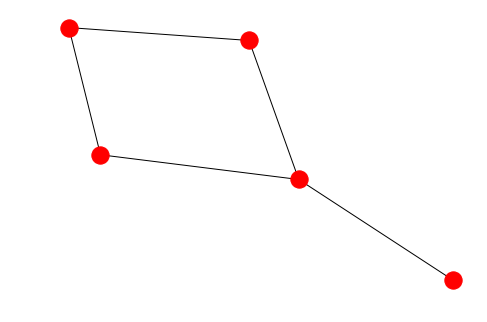

In [44]:
nx.draw(nx.Graph(A_ex))

In [47]:
is_connected(A_ex)

0
1
3
4
2


True

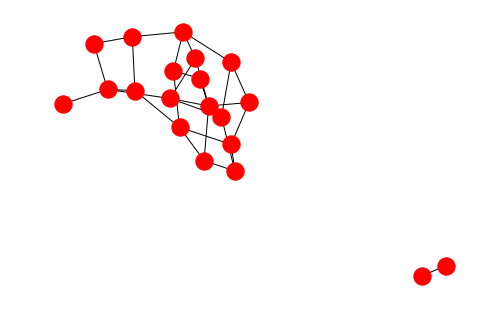

In [48]:
import networkx as nx
A = rand_graph(20,30)
nx.draw(nx.Graph(A))

In [49]:
is_connected(A)

0
13
8
11
9
6
10
2
1
4
17
18
3
19
16
5
14
15


False

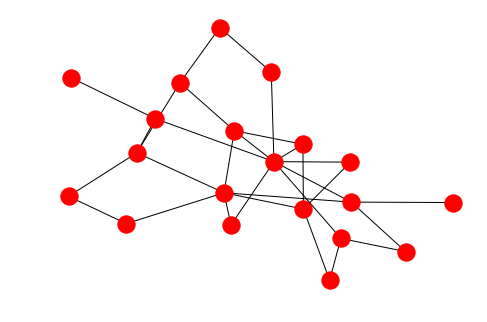

In [50]:
import networkx as nx
A = rand_graph(20,30)
nx.draw(nx.Graph(A))

In [51]:
is_connected(A)

0
2
4
1
5
11
8
17
3
14
6
19
13
18
7
12
10
9
15
16


True

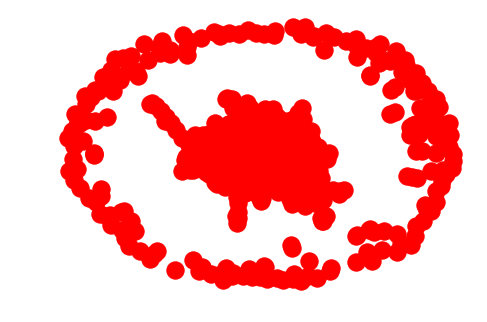

In [52]:
import networkx as nx
A = rand_graph(1000,1000)
#nx.draw(nx.Graph(A))

In [53]:
is_connected(A)

0
491
378
390
188
125
482
59
792
186
136
261
69
206
241
14
49
693
177
527
445
470
316
116
881
132
245
13
64
380
86
472
365
886
253
897
203
926
609
301
223
18
144
816
151
12
209
225
818
666
448
5
458
42
705
170
661
698
47
566
114
877
221
28
200
651
772
375
601
649
892
298
398
83
156
343
612
659
40
121
139
327
255
509
556
274
110
859
291
554
66
346
534
77
63
152
783
11
310
33
23
117
39
159
956
335
2
108
246
854
846
574
928
891
625
394
230
304
187
608
96
463
174
957
158
682
742
996
103
485
979
953
383
27
29
503
282
718
778
405
762
202
126
243
374
72
739
332
44
999
371
115
602
680
22
558
704
864
667
281
382
963
839
318
488
671
571
821
266
617
384
406
451
569
840
195
259
475
425
853
990
986
828
532
663
284
26
858
208
165
538
737
166
312
473
389
88
873
91
349
226
122
653
691
501
915
900
719
411
685
988
345
713
181
97
860
415
98
920
67
385
588
147
45
921
137
25
4
552
240
435
102
68
51
331
597
325
948
668
603
251
303
893
161
350
328
100
464
836
922
403
925
759
294
193
421
348
622
777
32
908
49

False